In [13]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [58]:
# Unsupervised-learning Test (40 tasks) — Customer Segmentation dataset (Kaggle)
# Dataset: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset

# Part A — Load & basic EDA (1–8)
# 1.Load the CSV into a Pandas DataFrame and show the first 5 rows.
customer=pd.read_excel ("Online Retail.xlsx")
mall=pd.read_csv("Mall_Customers.csv")
customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Dropping Customer ID columns
# customer.drop(columns=["CustomerID"],inplace=True)
# # mall.drop(columns=["CustomerID"],inplace=True)

In [59]:
# 2.Show the dataset shape (rows, columns) and column names with dtypes.
mall.shape ,mall.dtypes

((200, 5),
 CustomerID                 int64
 Genre                     object
 Age                        int64
 Annual Income (k$)         int64
 Spending Score (1-100)     int64
 dtype: object)

In [60]:
customer.shape ,customer.dtypes

((541909, 8),
 InvoiceNo              object
 StockCode              object
 Description            object
 Quantity                int64
 InvoiceDate    datetime64[ns]
 UnitPrice             float64
 CustomerID            float64
 Country                object
 dtype: object)

In [61]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [62]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
#3. Count unique values per column and list the top 10 most frequent values in a categorical field.
customer.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [64]:
mall.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [65]:
#4. Find missing values per column and report counts.
customer.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [66]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [67]:
#5. Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.
customer.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [68]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [69]:
#6. Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group.
mall.head()
mall['AgeGroup'] = pd.cut(mall['Age'], bins=[0,25,60,100], labels=['Young','Adult','Senior'])
print(mall['AgeGroup'].value_counts())

AgeGroup
Adult     145
Young      38
Senior     17
Name: count, dtype: int64


In [70]:
#7. Detect and count any unrealistic values (e.g., negative or zero values).
unrealistic_values = mall[(mall['Age'] <= 0) | (mall['Annual Income (k$)'] <= 0) |(mall['Spending Score (1-100)'] <= 0)]
count_unrealistic = unrealistic_values.shape[0]
print(unrealistic_values)
print(f"Number of unrealistic entries: {count_unrealistic}")

Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100), AgeGroup]
Index: []
Number of unrealistic entries: 0


In [55]:
#8. Find how many unique customers exist and which group/category is most common.
uniquecustomer=mall['CustomerID'].nunique()
print(f"The number of unique customers: {uniquecustomer}")
mostcommongenre=mall['Genre'].mode()[0]
print(f"Most Common Gender:{mostcommongenre}")

The number of unique customers: 200
Most Common Gender:Female


In [71]:
# Part B — Data cleaning & filtering (9–15)
#9. Remove rows with missing values in a key column and explain the pros/cons.
customer_cleaned = customer.dropna(subset=['CustomerID']).copy()


In [57]:
#10. Drop duplicate rows and report how many were dropped.
before = customer_cleaned.shape[0]
cleaned=customer_cleaned.drop_duplicates()
print(before)
print("Duplicates:", before - cleaned.shape[0])

540455
Duplicates: 5268


In [ ]:
#11. Filter out records where Age < 18.
mall_adults = mall[mall['Age'] >= 18]
mall.shape
# All were above 18 years of age

(200, 6)

In [ ]:
#12. Create a new categorical column from numeric data using conditional statements.
# Define a function using if-elif-else
def spending_category(score):
    if score < 40:
        return 'Low'
    elif score < 70:
        return 'Medium'
    else:
        return 'High'
mall['SpendingLevel'] = mall['Spending Score (1-100)'].apply(spending_category)
print(mall['SpendingLevel'].value_counts())


SpendingLevel
Medium    87
Low       59
High      54
Name: count, dtype: int64


In [77]:
#13. Replace missing values in a numeric column with the mean.
numeric_cols = cleaned.select_dtypes(include=['number'])
missing_numeric = numeric_cols.isnull().sum()
print(missing_numeric)

Quantity     0
UnitPrice    0
dtype: int64


In [78]:
#14. Bucket customers into categories based on quantiles (e.g., spending level).
mall['SpendingQuantile'] = pd.qcut(
    mall['Spending Score (1-100)'], q=4, labels=['Low','Mid-Low','Mid-High','High']
)

mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingLevel,SpendingQuantile
0,1,Male,19,15,39,Young,Low,Mid-Low
1,2,Male,21,15,81,Young,High,High
2,3,Female,20,16,6,Young,Low,Low
3,4,Female,23,16,77,Young,High,High
4,5,Female,31,17,40,Adult,Low,Mid-Low


In [81]:
#15. Explain and apply feature scaling to numeric features.
scaled_features = scaler.fit_transform(mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
# Part C — Aggregation & feature engineering (16–22)
#16. Compute average income by gender using groupby.
avg_income = mall.groupby('Genre')['Annual Income (k$)'].mean()
print(avg_income)

Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


In [88]:
#17.Calculate max, min, and mean for numeric columns per group.
print(mall.groupby('Genre')[['Annual Income (k$)']].agg(['max', 'min', 'mean']))

       Annual Income (k$)               
                      max min       mean
Genre                                   
Female                126  16  59.250000
Male                  137  15  62.227273


In [86]:
print(mall.groupby('Genre')[['Age']].agg(['max', 'min', 'mean']))

       Age               
       max min       mean
Genre                    
Female  68  18  38.098214
Male    70  18  39.806818


In [87]:
print(mall.groupby('Genre')[[ 'Spending Score (1-100)']].agg(['max', 'min', 'mean']))

       Spending Score (1-100)               
                          max min       mean
Genre                                       
Female                     99   5  51.526786
Male                       97   1  48.511364


In [85]:
#18.Create a new ratio feature (e.g., income-to-age).
mall['IncomeAgeRatio'] = mall['Annual Income (k$)'] / mall['Age']
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingLevel,SpendingQuantile,IncomeAgeRatio
0,1,Male,19,15,39,Young,Low,Mid-Low,0.789474
1,2,Male,21,15,81,Young,High,High,0.714286
2,3,Female,20,16,6,Young,Low,Low,0.800000
3,4,Female,23,16,77,Young,High,High,0.695652
4,5,Female,31,17,40,Adult,Medium,Mid-Low,0.548387


In [93]:
#19.Flag “High value” customers based on income and spending greater than average.
income_avg = mall['Annual Income (k$)'].mean()
score_avg = mall['Spending Score (1-100)'].mean()
mall['HighValue'] = (
    (mall['Annual Income (k$)'] > income_avg) &
    (mall['Spending Score (1-100)'] > score_avg)
)
print(mall['HighValue'].value_counts())

HighValue
False    152
True      48
Name: count, dtype: int64


In [94]:
#20.Compute correlation between numeric features.
correlation_matrix= mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [95]:
#21.Determine which gender has a higher average spending score.
Highgendspending=mall.groupby('Genre')['Spending Score (1-100)'].mean().sort_values(ascending=False)
print(Highgendspending)

Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [96]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   AgeGroup                200 non-null    category
 6   SpendingLevel           200 non-null    object  
 7   SpendingQuantile        200 non-null    category
 8   IncomeAgeRatio          200 non-null    float64 
 9   HighValue               200 non-null    bool    
dtypes: bool(1), category(2), float64(1), int64(4), object(2)
memory usage: 12.0+ KB


In [97]:
#22. Create a pivot table by age group and gender for average spending.
pd.pivot_table(mall,values='Spending Score (1-100)',index='Genre',columns='AgeGroup',aggfunc='mean')

C:\Users\hp\AppData\Local\Temp\ipykernel_22500\2532195561.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(mall,values='Spending Score (1-100)',index='Genre',columns='AgeGroup',aggfunc='mean')


AgeGroup,Young,Adult,Senior
Genre,,,
Female,58.650000,50.174419,47.166667
Male,50.833333,48.915254,42.545455


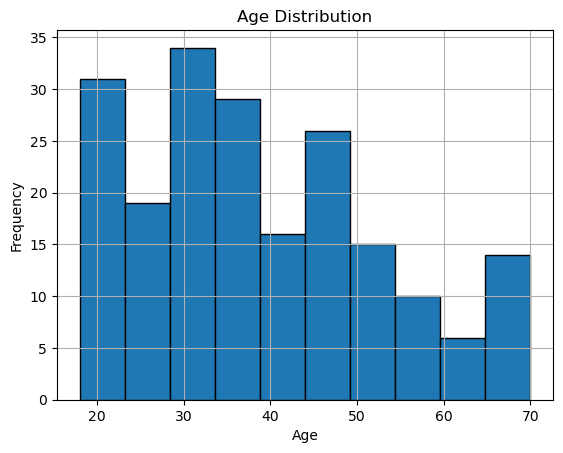

In [100]:
# Part D — Visualizations & group exploration (23–27)
#23. Plot a histogram of the Age distribution.
mall['Age'].hist(bins=10,edgecolor ='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

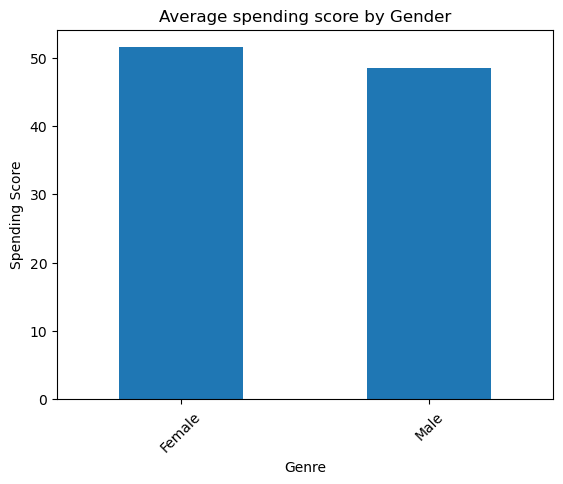

In [101]:
#24.Create a bar chart of average spending score by gender.
mall.groupby('Genre')['Spending Score (1-100)'].mean().plot(kind='bar')
plt.title('Average spending score by Gender')
plt.ylabel('Spending Score')
plt.xticks(rotation = 45)
plt.show()

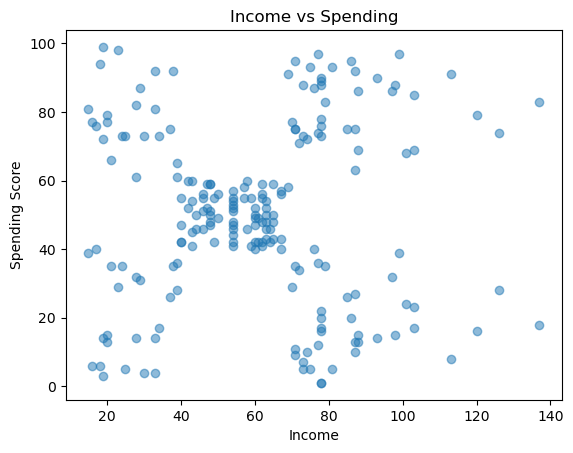

In [102]:
#25.Create a scatter plot of Annual Income vs Spending Score.
# Genre 
# Age 
# Annual Income (k$)
# Spending Score (1-100)
# AgeGroup 

plt.scatter(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],alpha = 0.5)
plt.title('Income vs Spending')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()


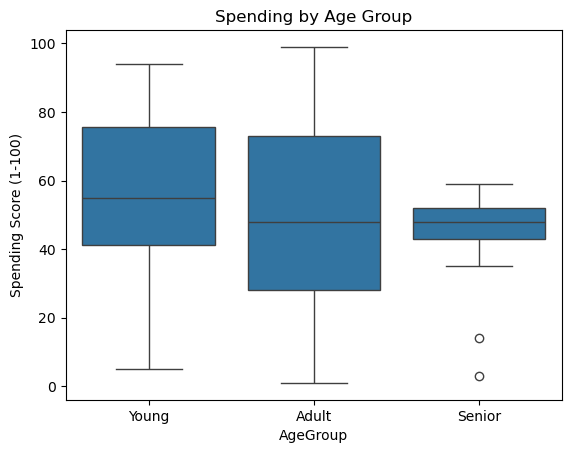

In [103]:
#26.Create a boxplot of spending score grouped by age bins.
sns.boxplot(x='AgeGroup',y='Spending Score (1-100)',data=mall)
plt.title('Spending by Age Group')
plt.show()

In [104]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   AgeGroup                200 non-null    category
 6   SpendingLevel           200 non-null    object  
 7   SpendingQuantile        200 non-null    category
 8   IncomeAgeRatio          200 non-null    float64 
 9   HighValue               200 non-null    bool    
dtypes: bool(1), category(2), float64(1), int64(4), object(2)
memory usage: 12.0+ KB


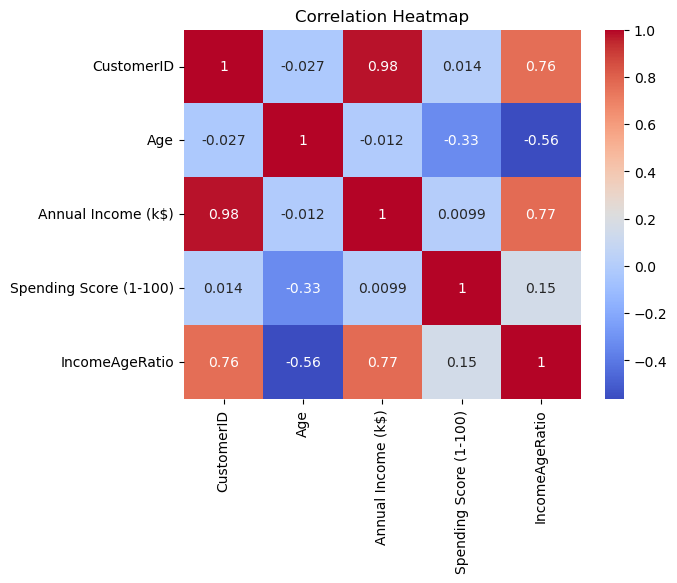

In [105]:
#27.Create a heatmap of correlations between numeric features.
# Age 
# Annual Income (k$)
# Spending Score (1-100)

corr = mall.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



Explained variance ratio: [0.50495142 0.49504858]


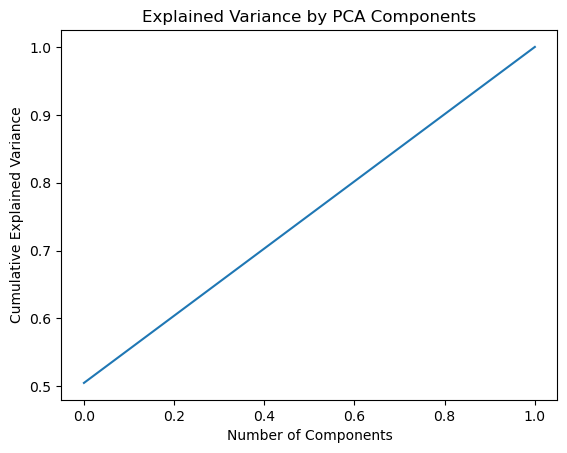

In [112]:
# Part E — Dimensionality reduction (PCA & t-SNE) (28–31)
#28.Run PCA on standardized income and spending features and plot explained variance.
features = ['Annual Income (k$)','Spending Score (1-100)']
x = mall[features]
x_scaled = StandardScaler().fit_transform(x)


explained_var = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_var)

pca = PCA()
pca.fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


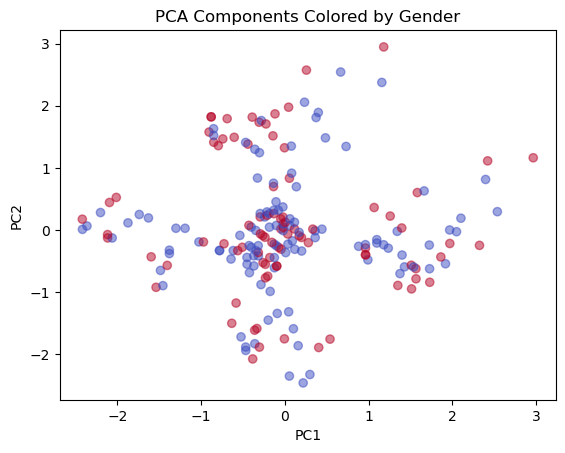

In [ ]:
#29.Plot 2D PCA components scatter colored by a category (e.g., Gender).
pca_2d = PCA(n_components=2)
components = pca_2d.fit_transform(x_scaled)

plt.scatter(components[:,0],components[:,1],c=(mall['Genre'] == 'Male'),cmap='coolwarm', alpha =0.5)
plt.title('PCA Components Colored by Gender')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


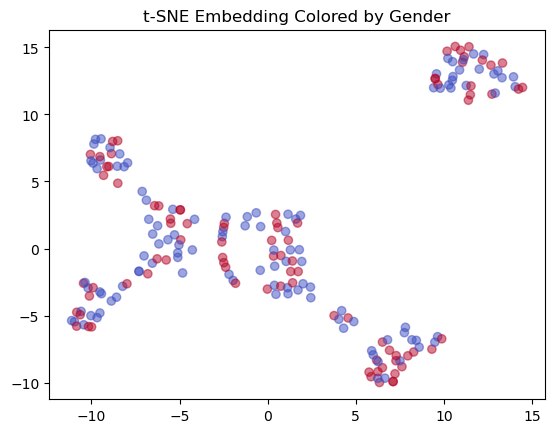

In [ ]:
#30.Run t-SNE and plot the 2D embedding.
tsne = TSNE(n_components=2,random_state=42)
tsne_results = tsne.fit_transform(x_scaled)

plt.scatter(tsne_results[:,0],tsne_results[:,1],c=(mall['Genre'] == 'Male'),cmap='coolwarm',alpha=0.5)
plt.title('t-SNE Embedding Colored by Gender')
plt.show()


In [ ]:
#31.Compare PCA and t-SNE plots — which shows clearer clusters?
#- PCA shows linear variance structure; t-SNE reveals nonlinear clusters.
#- You’ll often see tighter, more separated clusters in t-SNE, especially for high-dimensional data.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

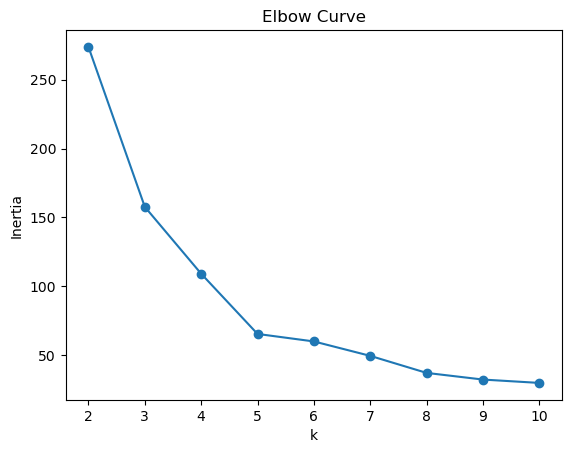

In [117]:
# Part F — Clustering & evaluation (32–40)
#32.Run k-means for k=2…10 on standardized features and plot the elbow curve.

inertia = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,11),inertia , marker = 'o')
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

k=2,Silhouette Score = 0.397
k=3,Silhouette Score = 0.467
k=4,Silhouette Score = 0.494
k=5,Silhouette Score = 0.555
k=6,Silhouette Score = 0.514
k=7,Silhouette Score = 0.502
k=8,Silhouette Score = 0.455
k=9,Silhouette Score = 0.457
k=10,Silhouette Score = 0.445


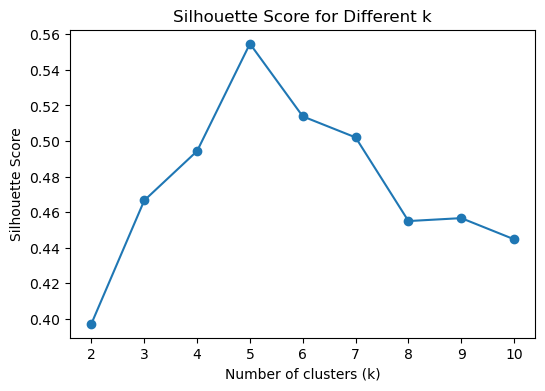

In [118]:
#33.Compute silhouette score for each k and identify the best k.
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled,labels)
    silhouette_scores.append(score)
    print(f"k={k},Silhouette Score = {score:.3f}")

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


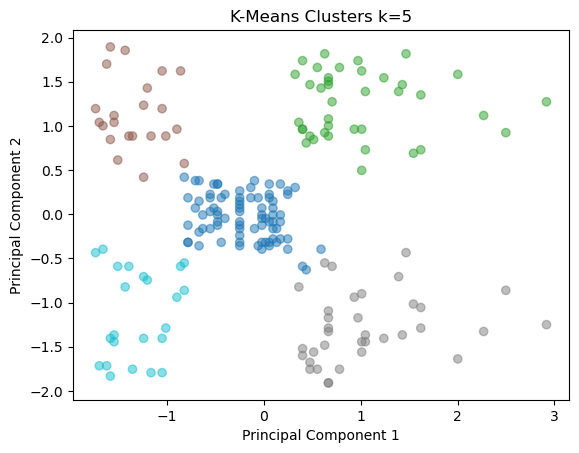

In [119]:
#34.Plot clusters for the chosen k using a scatter plot.
# The silhouette score measures how well each data point fits within its cluster compared to other clusters.
# The best k =5
best_k = 5
kmeans = KMeans(n_clusters=best_k,random_state=42)
labels = kmeans.fit_predict(x_scaled)

plt.scatter(x_scaled[:,0],x_scaled[:,1],c=labels,cmap='tab10',alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("K-Means Clusters k=5")
plt.show()


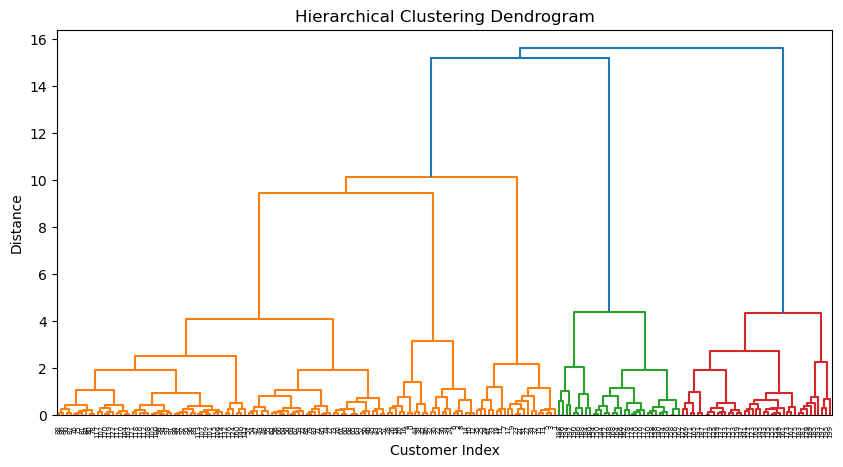

In [122]:
#35. Run hierarchical clustering and visualize a dendrogram.
linked = linkage(x_scaled,method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [123]:
mall['HCluster'] = fcluster(linked, t=best_k, criterion='maxclust')
print(mall[['Cluster', 'HCluster']].head())

   Cluster  HCluster
0        4         4
1        2         3
2        4         4
3        2         3
4        4         4


In [128]:
#36. Cut the dendrogram at k clusters and compare with k-means.
k = 5  
hier_labels = fcluster(linked, k, criterion='maxclust')

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)

mall['HierCluster'] = hier_labels
mall['KMeansCluster'] = kmeans_labels

print(mall[['Annual Income (k$)', 'Spending Score (1-100)', 
            'HierCluster', 'KMeansCluster']].head())

   Annual Income (k$)  Spending Score (1-100)  HierCluster  KMeansCluster
0                  15                      39            4              4
1                  15                      81            3              2
2                  16                       6            4              4
3                  16                      77            3              2
4                  17                      40            4              4


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [129]:
#37.Profile each cluster: average age, income, spending score.
# Age 
# Annual Income (k$)
# Spending Score (1-100)
mall['Cluster'] = labels
mall.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [132]:
#38.Check cluster sizes — are some clusters too small?
# For hierarchical clusters
print("Hierarchical clustering sizes:")
print(mall['HierCluster'].value_counts().sort_index())

# For K-Means clusters
print("\nK-Means clustering sizes:")
print(mall['KMeansCluster'].value_counts().sort_index())

Hierarchical clustering sizes:
HierCluster
1    39
2    32
3    21
4    23
5    85
Name: count, dtype: int64

K-Means clustering sizes:
KMeansCluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


In [ ]:
#39.Run k-means with different random states and see if cluster assignments change.
k = 5
kmeans1 = KMeans(n_clusters=k, random_state=35)
kmeans2 = KMeans(n_clusters=k, random_state=3)
labels1 = kmeans1.fit_predict(x_scaled)
labels2 = kmeans2.fit_predict(x_scaled)

comparison = pd.DataFrame({'KMeans_35': labels1, 'KMeans_3': labels2})
print(comparison.head(10))

   KMeans_35  KMeans_3
0          4         4
1          1         3
2          4         4
3          1         3
4          4         4
5          1         3
6          4         4
7          1         3
8          4         4
9          1         3


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [136]:
#40.Export the dataset with cluster labels to CSV.
mall.to_csv('Clustered_mall_data.csv',index=False)